## Training yolo

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
%cd /content/drive/MyDrive/merged.v2i.yolov11

[Errno 2] No such file or directory: '/content/drive/MyDrive/merged.v2i.yolov11'
/content


In [ ]:
# Upgrade and reinstall ultralytics and torch cleanly
# !pip uninstall -y ultralytics torch torchvision torchaudio
# !pip install --no-cache-dir torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
!pip install --no-cache-dir ultralytics


In [ ]:
import ultralytics
ultralytics.__version__

In [ ]:
!unzip -o "/content/drive/MyDrive/merged.v2i.yolov11.zip" -d "/content/merged_data/"

In [6]:
from ultralytics import YOLO

# Load a COCO-pretrained YOLO11n model
model = YOLO("yolo11m.pt")

100%|██████████| 38.8M/38.8M [00:00<00:00, 115MB/s]


In [7]:
path = "/content/merged_data/data.yaml"


In [8]:
results = model.train(
    data=path,
    epochs=40,
    batch=6,
    name="yolov11m_exp1_colab",
    project="/content/drive/MyDrive/yolo_train_logs",
    device=0,
    save=True,
    patience=5,
    verbose=True,
    workers=2,
    resume=False,
    exist_ok=True
)


Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=6, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/merged_data/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=40, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov11m_exp1_colab, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, perspective=0.0, plots=True, pose=12.0, p

100%|██████████| 755k/755k [00:00<00:00, 21.8MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

  8                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  1    990976  ultralytics.nn.modules.block.C2PSA           [512, 512, 1]                 
 11                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 12             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 13                  -1  1   1642496  ultralytics.nn.modules.block.C3k2            [1024, 512, 1, True]          
 14                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 15             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 16                  -1  1    542720  ultralytics.nn.modules.block.C3k2            [1024

100%|██████████| 5.35M/5.35M [00:00<00:00, 6.33MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1411.3±379.9 MB/s, size: 51.5 KB)


train: Scanning /content/merged_data/train/labels... 8378 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8378/8378 [00:03<00:00, 2623.56it/s]


train: New cache created: /content/merged_data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 831.3±430.7 MB/s, size: 46.6 KB)


val: Scanning /content/merged_data/valid/labels... 1505 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1505/1505 [00:01<00:00, 1227.85it/s]

val: New cache created: /content/merged_data/valid/labels.cache


Plotting labels to /content/drive/MyDrive/yolo_train_logs/yolov11m_exp1_colab/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.000515625), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/yolo_train_logs/yolov11m_exp1_colab
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      3.25G      1.963      2.197      1.974          3        640: 100%|██████████| 1397/1397 [05:56<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:25<00:00,  4.88it/s]


                   all       1505       1581      0.323      0.373      0.258      0.108

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      3.82G      1.959      2.173      1.969          7        640: 100%|██████████| 1397/1397 [05:49<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:24<00:00,  5.24it/s]

                   all       1505       1581      0.501      0.398      0.435      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      3.82G      1.865      2.026      1.891          6        640: 100%|██████████| 1397/1397 [05:48<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:24<00:00,  5.15it/s]

                   all       1505       1581      0.595      0.509      0.593      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      3.82G      1.794      1.863      1.819          2        640: 100%|██████████| 1397/1397 [05:48<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:24<00:00,  5.14it/s]

                   all       1505       1581      0.645      0.595      0.662      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      3.82G      1.736      1.743      1.788          4        640: 100%|██████████| 1397/1397 [05:47<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:24<00:00,  5.16it/s]

                   all       1505       1581      0.726      0.684      0.761      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      3.82G      1.671      1.608      1.733          5        640: 100%|██████████| 1397/1397 [05:47<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:24<00:00,  5.21it/s]

                   all       1505       1581      0.725      0.651      0.737      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      3.82G      1.646      1.557      1.715          5        640: 100%|██████████| 1397/1397 [05:46<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:24<00:00,  5.17it/s]

                   all       1505       1581      0.758      0.651      0.748      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      3.82G      1.608      1.495       1.68          3        640: 100%|██████████| 1397/1397 [05:47<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:24<00:00,  5.18it/s]

                   all       1505       1581      0.785      0.682      0.785      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      3.82G      1.579      1.442      1.659          2        640: 100%|██████████| 1397/1397 [05:47<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:24<00:00,  5.21it/s]

                   all       1505       1581      0.798       0.72      0.809      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      3.82G      1.552       1.37      1.641          6        640: 100%|██████████| 1397/1397 [05:47<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:24<00:00,  5.15it/s]

                   all       1505       1581      0.798      0.694      0.812      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      3.82G      1.532      1.328      1.624          0        640: 100%|██████████| 1397/1397 [05:47<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:24<00:00,  5.18it/s]

                   all       1505       1581      0.809      0.748      0.845      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      3.82G      1.511      1.312      1.617          3        640: 100%|██████████| 1397/1397 [05:48<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:24<00:00,  5.22it/s]

                   all       1505       1581      0.821      0.748      0.845      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      3.82G      1.484      1.254       1.59          4        640: 100%|██████████| 1397/1397 [05:48<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:24<00:00,  5.18it/s]

                   all       1505       1581      0.844      0.808      0.879      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      3.82G      1.465      1.235      1.581          4        640: 100%|██████████| 1397/1397 [05:47<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:24<00:00,  5.18it/s]

                   all       1505       1581      0.851      0.807      0.888      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      3.82G       1.46      1.224      1.582          1        640: 100%|██████████| 1397/1397 [05:47<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:24<00:00,  5.16it/s]

                   all       1505       1581      0.839      0.784      0.875      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      3.82G      1.444      1.202      1.565          3        640: 100%|██████████| 1397/1397 [05:44<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:24<00:00,  5.17it/s]

                   all       1505       1581      0.849      0.773      0.864      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      3.82G      1.431      1.149      1.554          4        640: 100%|██████████| 1397/1397 [05:45<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:24<00:00,  5.14it/s]

                   all       1505       1581      0.868      0.805      0.886       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      3.82G       1.42      1.138      1.546          8        640: 100%|██████████| 1397/1397 [05:48<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:24<00:00,  5.24it/s]

                   all       1505       1581      0.866      0.781      0.873      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      3.82G      1.395      1.099      1.521          1        640: 100%|██████████| 1397/1397 [05:47<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:24<00:00,  5.17it/s]

                   all       1505       1581      0.867      0.826      0.898      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      3.82G      1.373      1.087      1.503          5        640: 100%|██████████| 1397/1397 [05:47<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:24<00:00,  5.16it/s]

                   all       1505       1581      0.883      0.819      0.898      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      3.82G       1.36      1.056      1.495          3        640: 100%|██████████| 1397/1397 [05:47<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:24<00:00,  5.18it/s]

                   all       1505       1581      0.897      0.817      0.905        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      3.82G      1.358      1.038      1.496          1        640: 100%|██████████| 1397/1397 [05:48<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:23<00:00,  5.29it/s]

                   all       1505       1581      0.908       0.82      0.908      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      3.82G      1.342      1.024      1.486          3        640: 100%|██████████| 1397/1397 [05:47<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:24<00:00,  5.20it/s]

                   all       1505       1581      0.907      0.819      0.912      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      3.82G      1.332      1.006      1.477          6        640: 100%|██████████| 1397/1397 [05:47<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:24<00:00,  5.17it/s]

                   all       1505       1581      0.904      0.844      0.916      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      3.82G      1.315     0.9806      1.463          5        640: 100%|██████████| 1397/1397 [05:47<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:24<00:00,  5.17it/s]

                   all       1505       1581      0.902      0.817      0.915      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      3.82G       1.31     0.9712      1.463          4        640: 100%|██████████| 1397/1397 [05:48<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:24<00:00,  5.21it/s]

                   all       1505       1581      0.905      0.825      0.915      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      3.82G      1.289     0.9602      1.449          4        640: 100%|██████████| 1397/1397 [05:47<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:24<00:00,  5.20it/s]

                   all       1505       1581      0.906      0.835      0.917      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      3.82G      1.294     0.9582      1.452          3        640: 100%|██████████| 1397/1397 [05:48<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:24<00:00,  5.15it/s]

                   all       1505       1581      0.918      0.834      0.926      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      3.82G      1.265     0.9296      1.434          1        640: 100%|██████████| 1397/1397 [05:47<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:24<00:00,  5.15it/s]

                   all       1505       1581        0.9      0.851      0.925      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      3.82G      1.247     0.9144      1.426          3        640: 100%|██████████| 1397/1397 [05:49<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:24<00:00,  5.24it/s]

                   all       1505       1581       0.89      0.864      0.933      0.636


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      3.82G      1.219     0.7024      1.417          2        640: 100%|██████████| 1397/1397 [05:47<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:24<00:00,  5.13it/s]

                   all       1505       1581      0.902      0.868      0.928      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      3.82G      1.192     0.6846      1.403          2        640: 100%|██████████| 1397/1397 [05:49<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:24<00:00,  5.21it/s]

                   all       1505       1581      0.922      0.857      0.934      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      3.82G      1.169     0.6624      1.376          2        640: 100%|██████████| 1397/1397 [05:47<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:24<00:00,  5.16it/s]

                   all       1505       1581      0.928      0.846      0.937      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      3.82G      1.154     0.6438      1.372          2        640: 100%|██████████| 1397/1397 [05:46<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:24<00:00,  5.15it/s]

                   all       1505       1581      0.909      0.868      0.936      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      3.82G      1.138     0.6362      1.356          2        640: 100%|██████████| 1397/1397 [05:46<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:24<00:00,  5.14it/s]

                   all       1505       1581       0.92      0.871       0.94      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      3.82G      1.127     0.6162      1.349          2        640: 100%|██████████| 1397/1397 [05:47<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:24<00:00,  5.20it/s]

                   all       1505       1581      0.917      0.876      0.943       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      3.82G      1.103     0.6031      1.326          2        640: 100%|██████████| 1397/1397 [05:47<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:24<00:00,  5.15it/s]

                   all       1505       1581      0.921      0.868       0.94      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      3.82G      1.088     0.5903      1.317          2        640: 100%|██████████| 1397/1397 [05:46<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:24<00:00,  5.18it/s]

                   all       1505       1581      0.916      0.882      0.943      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      3.82G      1.085     0.5796      1.312          2        640: 100%|██████████| 1397/1397 [05:55<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:26<00:00,  4.73it/s]

                   all       1505       1581      0.935      0.865      0.943      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      3.82G      1.061     0.5723      1.295          2        640: 100%|██████████| 1397/1397 [05:47<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:24<00:00,  5.21it/s]

                   all       1505       1581      0.929       0.87      0.942      0.657



40 epochs completed in 4.155 hours.
Optimizer stripped from /content/drive/MyDrive/yolo_train_logs/yolov11m_exp1_colab/weights/last.pt, 40.5MB
Optimizer stripped from /content/drive/MyDrive/yolo_train_logs/yolov11m_exp1_colab/weights/best.pt, 40.5MB

Validating /content/drive/MyDrive/yolo_train_logs/yolov11m_exp1_colab/weights/best.pt...
Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:24<00:00,  5.16it/s]


                   all       1505       1581      0.917      0.876      0.943      0.661
Speed: 0.3ms preprocess, 11.2ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to /content/drive/MyDrive/yolo_train_logs/yolov11m_exp1_colab


In [10]:
# results = model.train(
#     data=path,
#     epochs=100,
#     batch=7,
#     name="yolov11m_custom_exp_final",
#     # project="runs/train",
#     device=0,
#     resume=True  # <--- Resume from last.pt
# )


In [12]:
# import shutil
# from google.colab import files

# shutil.copy(f"{drive_path}/custom_model_exp1/weights/best.pt", "/content/best.pt")
# files.download("/content/best.pt")

In [13]:
metrics = model.val()  # evaluating model performance on the validation set

Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 994.7±322.2 MB/s, size: 28.2 KB)


val: Scanning /content/merged_data/valid/labels.cache... 1505 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1505/1505 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:46<00:00,  5.36it/s]


                   all       1505       1581      0.917      0.875      0.942       0.66
Speed: 0.4ms preprocess, 26.5ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to /content/drive/MyDrive/yolo_train_logs/yolov11m_exp1_colab


In [ ]:
%load_ext tensorboard

# Point to the exact experiment folder
%tensorboard --logdir /content/drive/MyDrive/yolo_train_logs/yolov11m_exp1_colab


In [5]:
from ultralytics import YOLO


model_path = "/content/drive/MyDrive/yolo_train_logs/yolov11m_exp1_colab/weights/best.pt"


model = YOLO(model_path)

In [11]:
metrics = model.val(data="/content/merged_data/data.yaml")

Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 26.4MB/s]

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 631.7±152.5 MB/s, size: 33.9 KB)



val: Scanning /content/merged_data/valid/labels... 1505 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1505/1505 [00:00<00:00, 1644.26it/s]


val: New cache created: /content/merged_data/valid/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [53:50<00:00, 34.00s/it]


                   all       1505       1581      0.917      0.875      0.942       0.66
Speed: 7.8ms preprocess, 2130.1ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val


In [ ]:
# printing metrics of our model
print(f"mAP50: {metrics.box.map50:.4f}")
print(f"mAP50-95: {metrics.box.map:.4f}")
print(f"Precision: {metrics.box.precision:.4f}")
print(f"Recall: {metrics.box.recall:.4f}")

In [12]:
# predicting on an image
results = model.predict(source="drone.jpg", save=True, conf=0.25)


image 1/1 /content/drone.jpg: 416x640 1 drone, 900.7ms
Speed: 4.5ms preprocess, 900.7ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict


In [13]:
print(results[0].names)  # Dict of class index -> class name
# print(results[0].boxes.cls)  # Tensor of predicted class indices

{0: 'drone'}


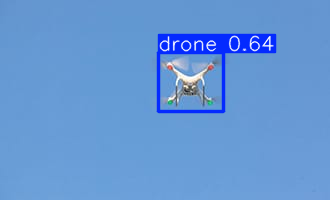

In [ ]:
results[0].show()  #image

In [22]:
with open("/content/results_summary_exp1.txt", "w") as f:
    f.write("YOLOv11 Training Summary\n")
    f.write("============================================\n")
    f.write(f"Model: yolov11m\n")
    f.write(f"Epochs: 100\n")
    f.write(f"Batch Size: 10\n")
    f.write(f"Patience: 10\n\n")
    f.write("Final Evaluation Metrics:\n")
    f.write(f"mAP50: {metrics.box.map50:.4f}\n")
    f.write(f"mAP50-95: {metrics.box.map:.4f}\n")

### To load the model

In [ ]:
best_model = YOLO("runs/train/yolov11n_exp1/weights/best.pt")
results = best_model.predict("drone.jpg")

YOLOv11 saves the best model in:
``
runs/train/yolov11n_exp1/weights/best
``

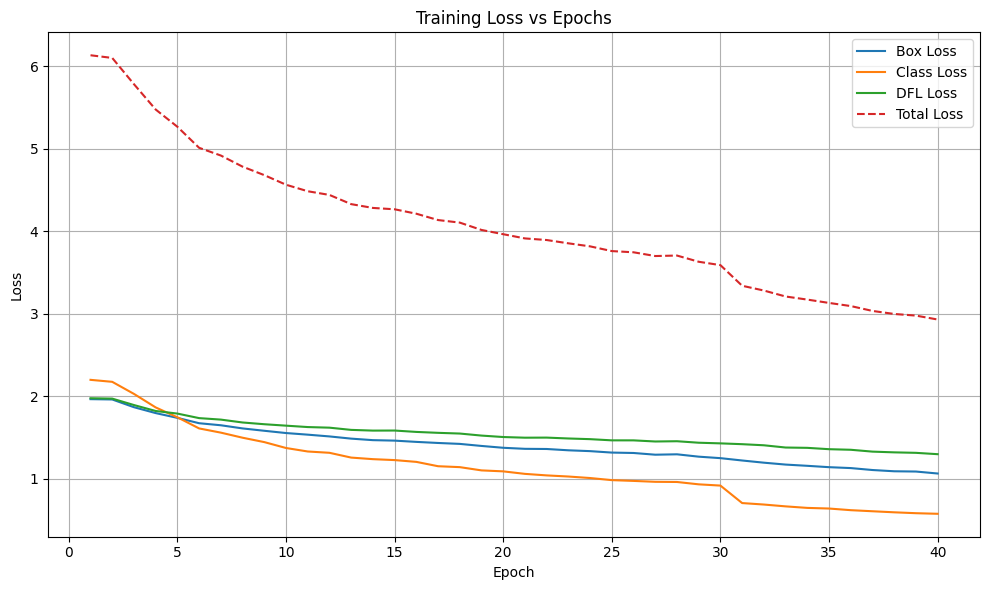

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV and clean column names
csv_path = "/content/drive/MyDrive/yolo_train_logs/yolov11m_exp1_colab/results.csv"
df = pd.read_csv(csv_path)
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces

# Plot training loss curves
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['train/box_loss'], label='Box Loss')
plt.plot(df['epoch'], df['train/cls_loss'], label='Class Loss')
plt.plot(df['epoch'], df['train/dfl_loss'], label='DFL Loss')

# Total loss (sum of three)
total_loss = df['train/box_loss'] + df['train/cls_loss'] + df['train/dfl_loss']
plt.plot(df['epoch'], total_loss, label='Total Loss', linestyle='--')

# Plot aesthetics
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss vs Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


'''
This figure shows how the training losses—box loss, class loss, and DFL (Distribution Focal Loss)—change over training epochs. These losses help measure how well the YOLO model is learning:

Box loss (train/box_loss): Measures how accurately predicted bounding boxes match ground truth.

Class loss (train/cls_loss): Measures how accurately objects are classified.

DFL loss (train/dfl_loss): Helps refine box predictions by modeling localization uncertainty.
'''

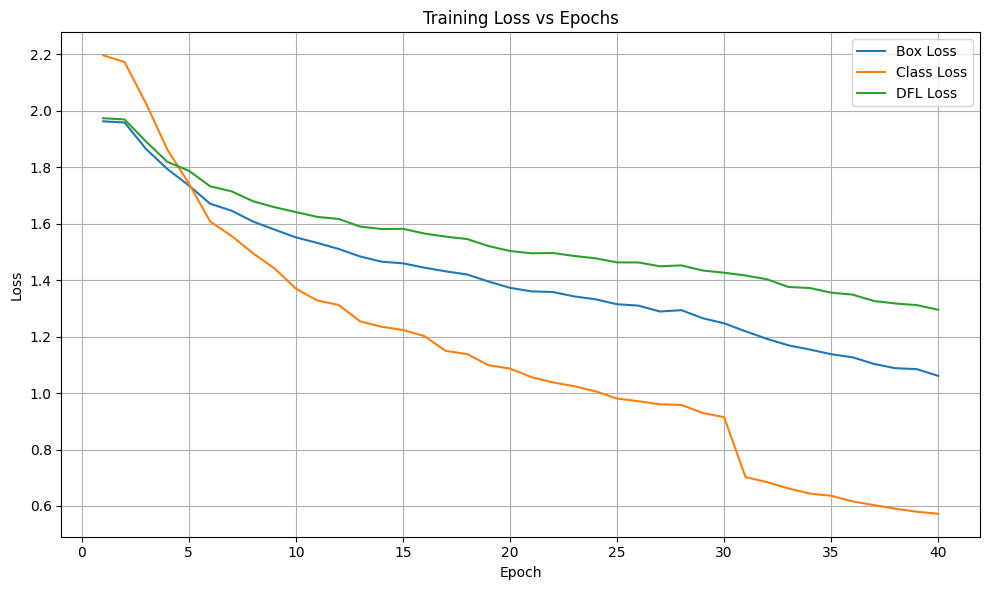

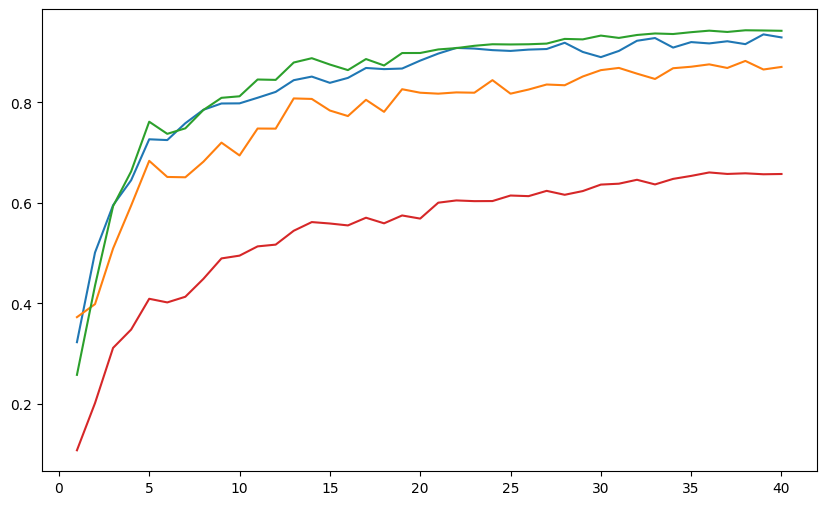

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to your CSV file
csv_path = "/content/drive/MyDrive/yolo_train_logs/yolov11m_exp1_colab/results.csv"

# Load the CSV file and clean column names
df = pd.read_csv(csv_path)
df.columns = df.columns.str.strip()  # Strip extra spaces

# Use the 'epoch' column for X-axis (not index)
epochs = df['epoch']

# ----- Plot 1: Training Losses -----
plt.figure(figsize=(10, 6))
plt.plot(epochs, df['train/box_loss'], label='Box Loss')
plt.plot(epochs, df['train/cls_loss'], label='Class Loss')
plt.plot(epochs, df['train/dfl_loss'], label='DFL Loss')

plt.title("Training Loss vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ----- Plot 2: Validation Metrics -----
plt.figure(figsize=(10, 6))
plt.plot(epochs, df['metrics/precision(B)'], label='Precision')
plt.plot(epochs, df['metrics/recall(B)'], label='Recall')
plt.plot(epochs, df['metrics/mAP50(B)'], label='mAP@0.5')
plt.plot(epochs, df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95')

'''
Summary of Metrics:
Precision: Of all predicted boxes, how many were correct.

Recall: Of all actual ground truth boxes, how many were detected.

mAP@0.5: Mean Average Precision at IoU 0.5 — standard accuracy for object detection.

mAP@0.5:0.95: Stricter average metric, better reflects model quality.
'''


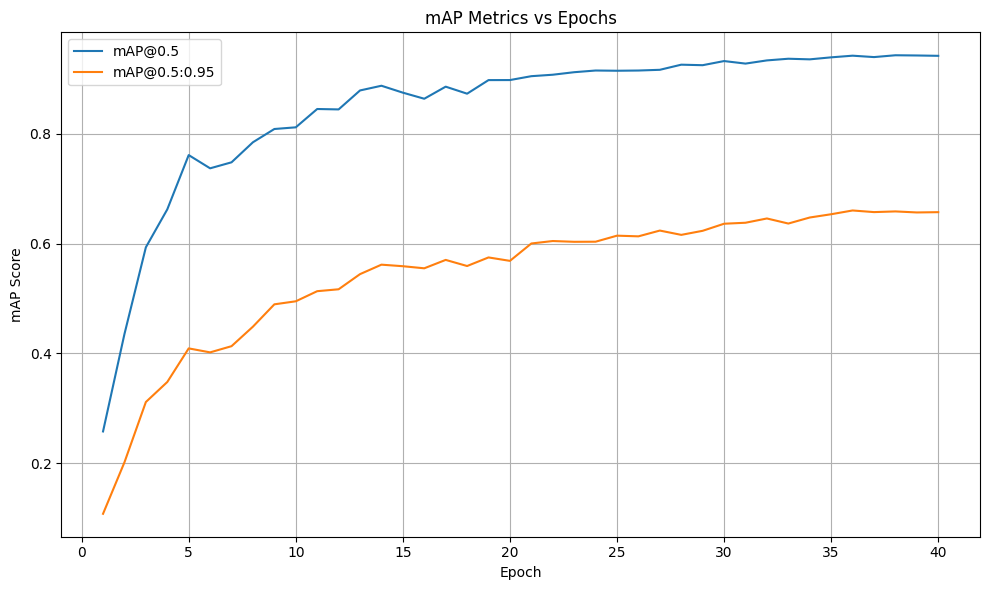

In [34]:
# Plot only mAP50 and mAP50-95
plt.figure(figsize=(10, 6))
plt.plot(epochs, df['metrics/mAP50(B)'], label='mAP@0.5')
plt.plot(epochs, df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95')

plt.title("mAP Metrics vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("mAP Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Plot total loss (box + cls + dfl)
df['total_loss'] = df['box_loss'] + df['cls_loss'] + df['dfl_loss']
plt.plot(epochs, df['total_loss'], label='Total Loss')


In [29]:
# concise summary
model.info()

YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs


(125, 20030803, 0, 67.6499968)

In [28]:
!pip install torchinfo
from torchinfo import summary
summary(model.model, input_size=(1, 3, 640, 640))

Layer (type:depth-idx)                                  Output Shape              Param #
DetectionModel                                          [1, 5, 8400]              --
├─Sequential: 1-1                                       --                        --
│    └─Conv: 2-1                                        [1, 64, 320, 320]         --
│    │    └─Conv2d: 3-1                                 [1, 64, 320, 320]         (1,792)
│    └─Detect: 2-174                                    --                        (recursive)
│    │    └─ModuleList: 3-190                           --                        (recursive)
│    └─Conv: 2-3                                        [1, 128, 160, 160]        --
│    │    └─Conv2d: 3-3                                 [1, 128, 160, 160]        (73,856)
│    └─Detect: 2-174                                    --                        (recursive)
│    │    └─ModuleList: 3-190                           --                        (recursive)
│    └─C3k2: 